# Face Detection with OpenCV

**Load image from folder**

In [1]:
import cv2

In [2]:
image = cv2.imread('office_life.jpg')

In [3]:
image.shape

(183, 275, 3)

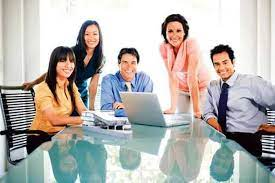

In [4]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

image has 3 channels (BGR)
To use cascade turn it to grayscale

In [5]:
image_gray = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)

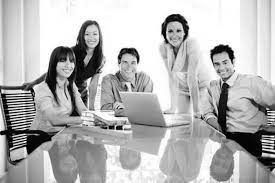

In [6]:
cv2_imshow(image_gray)


*   Cascade classifier uses adaboost model
*   The classifier uses an xml file with all filters
*   each filter runs over the image and subtracts the black pixcels from the wite ones
*   the filter runs from left to right and from up to down






In [7]:
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [8]:
detections = face_detector.detectMultiScale(image_gray)

In [9]:
detections

array([[161,  20,  27,  27],
       [ 54,  51,  26,  26],
       [ 96,  26,  77,  77],
       [117,  53,  26,  26],
       [207,  52,  28,  28]], dtype=int32)

In [10]:
len(detections)

5

5 faces were detected

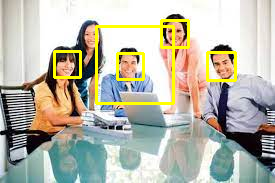

In [11]:
for (x, y, w, h) in detections:
  #print(x, y, w, h)
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,255), 2)
cv2_imshow(image)

4 faces are detected ok but on face is wrong - one false positive

To fix the false positive there is a cascade parameter when detecting the faces - scaleFactor takes a detected object and rescale it to see if it is a face (the larger the face in the image the larger the scale)

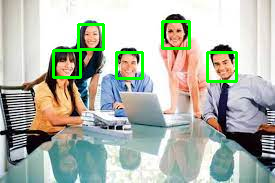

In [12]:
image = cv2.imread('office_life.jpg')
image_gray = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
detections = face_detector.detectMultiScale(image_gray, scaleFactor = 1.09)
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

minNeighbors – Parameter specifying how many neighbors each candidate rectangle should have to retain it.
missing detection
minSize - minimum size of the bounding box
maxSize - maximum size of the bounding box

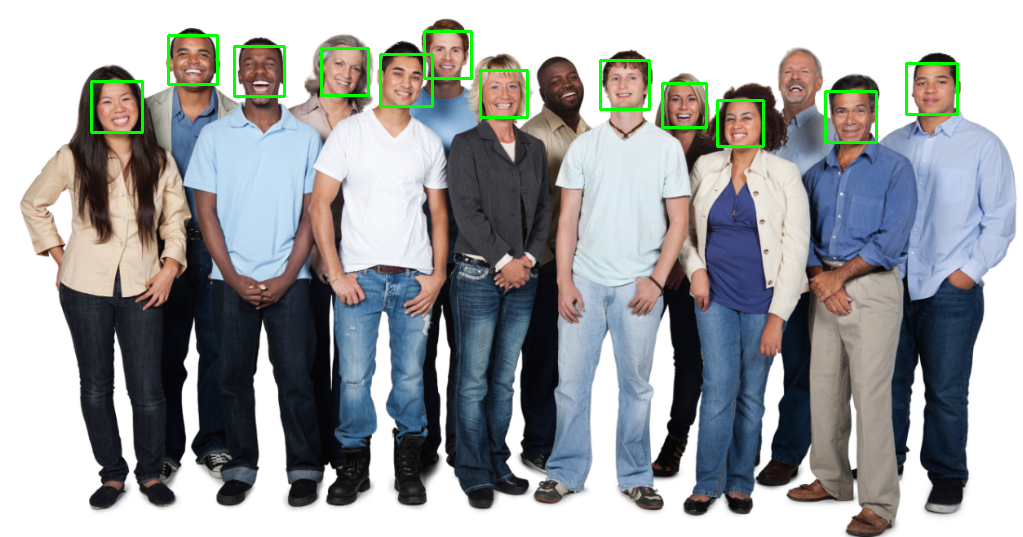

In [19]:
image = cv2.imread('group_people.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.2,  minNeighbors=7,
                                            minSize=(20,20), maxSize=(100,100))
for (x, y, w, h) in detections:  
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

some times we need to decide between false positive and 

**Eye detector**

In [20]:
image = cv2.imread('people.jpg')
image.shape

(1280, 1920, 3)

In [30]:
eye_detector = cv2.CascadeClassifier('haarcascade_eye.xml')

(1280, 1920, 3)


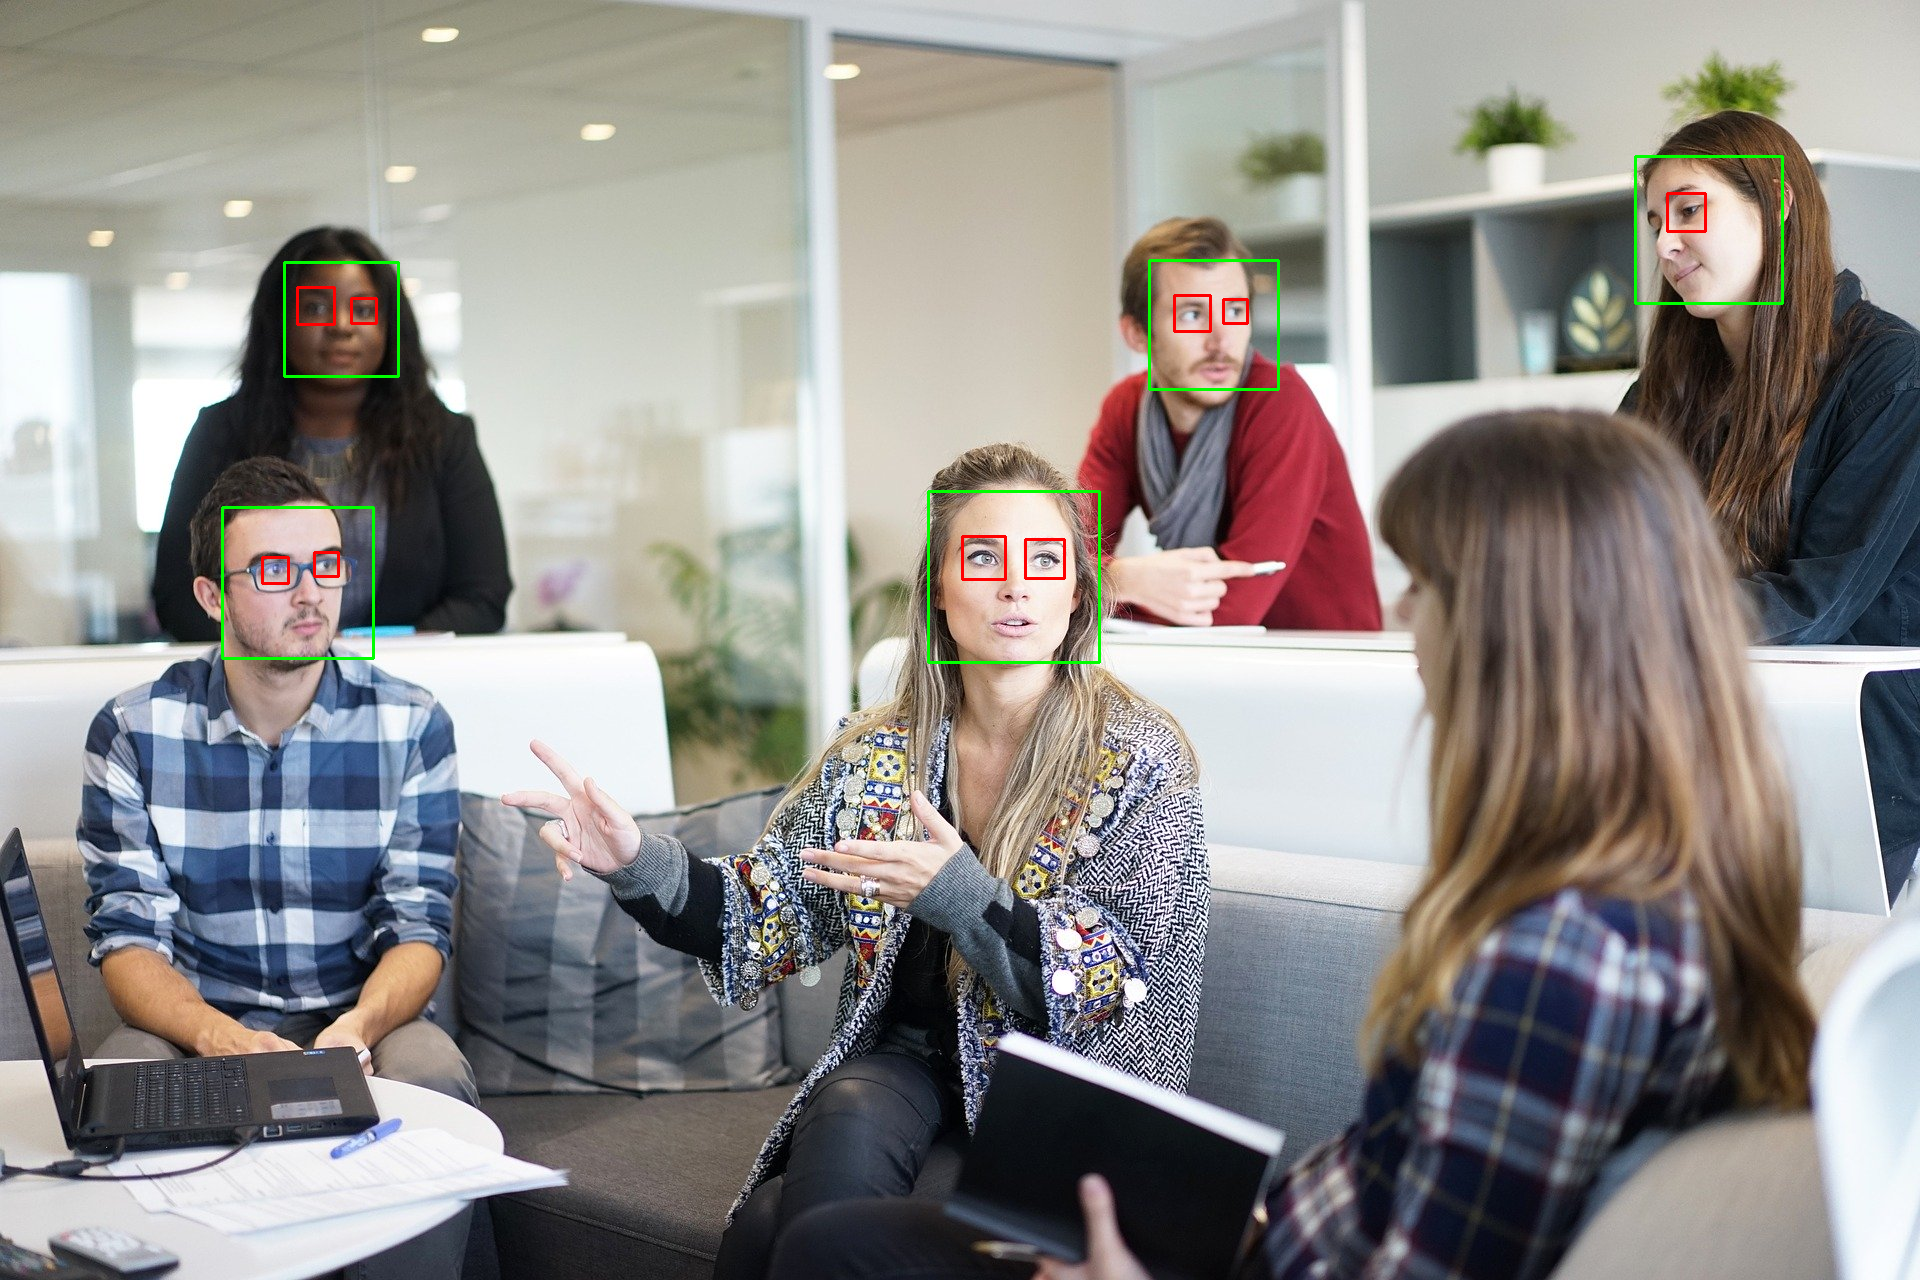

In [32]:
image = cv2.imread('people.jpg')
print(image.shape)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

face_detections = face_detector.detectMultiScale(image_gray, scaleFactor = 1.3, minSize = (30,30))
for (x, y, w, h) in face_detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)

eye_detections = eye_detector.detectMultiScale(image_gray, scaleFactor = 1.1, minNeighbors=10, maxSize=(70,70))
for (x, y, w, h) in eye_detections: 
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 2)

cv2_imshow(image)